# Linear Regression
In this section, you'll use linear regression to predict life expectancy from body mass index (BMI). Before you do that, let's go over the tools required to build this model.

For your linear regression model, you'll be using scikit-learn's LinearRegression class. This class provides the function fit() to fit the model to your data.

`from sklearn.linear_model import LinearRegression`

`model = LinearRegression()`

`model.fit(x_values, y_values)`

In the example above, the model variable is a linear regression model that has been fitted to the data x_values and y_values. Fitting the model means finding the best line that fits the training data. Let's make two predictions using the model's predict() function.

`print(model.predict([ [127], [248] ]))`

> [[ 438.94308857, 127.14839521]]

The model returned an array of predictions, one prediction for each input array. The first input, [127], got a prediction of 438.94308857. The second input, [248], got a prediction of 127.14839521. The reason for predicting on an array like [127] and not just 127, is because you can have a model that makes a prediction using multiple features. We'll go over using multiple variables in linear regression later in this lesson. For now, let's stick to a single value.

# Linear Regression Quiz
In this quiz, you'll be working with data on the average life expectancy at birth and the average BMI for males across the world. The data comes from Gapminder.

The data file can be found under the "bmi_and_life_expectancy.csv" tab in the quiz below. It includes three columns, containing the following data:

Country – The country the person was born in.
Life expectancy – The average life expectancy at birth for a person in that country.
BMI – The mean BMI of males in that country.
You'll need to complete each of the following steps:
## 1. Load the data

The data is in the file called "bmi_and_life_expectancy.csv".
Use pandas read_csv to load the data into a dataframe (don't forget to import pandas!)
Assign the dataframe to the variable bmi_life_data.

In [55]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data into a DataFrame
bmi_life_data = pd.read_csv('BMI_and_Life_expectancy.csv') 

In [56]:
bmi_life_data.head()

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083


## 2. Build a linear regression model

Create a regression model using scikit-learn's LinearRegression and assign it to bmi_life_model.
Fit the model to the data.

In [58]:
X = bmi_life_data[['BMI']]                     # By using two [[]] x_values and y_values are DataFrame
y = bmi_life_data[['Life expectancy']]
print(type(X), X.shape)
print(type(y), y.shape)

<class 'pandas.core.frame.DataFrame'> (129, 1)
<class 'pandas.core.frame.DataFrame'> (129, 1)


In [59]:
# Fit the model and Assign it to bmi_life_model
bmi_life_model = LinearRegression()
bmi_life_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The slope parameters $(w)$, also called weights or coefficients, are stored in the coef_ attribute, while the offset or intercept $(b)$ is stored in the intercept_ attribute:

In [60]:
print(f"Coefficient: {bmi_life_model.coef_}")
print(f"Intercept: {bmi_life_model.intercept_}")

Coefficient: [[2.64379444]]
Intercept: [4.46327713]


In [62]:
print(f"Model Score R^2: {bmi_life_model.score(X, y):.2f}")

Model Score R^2: 0.53


## 3. Predict using the model

Predict using a BMI of 21.07931 and assign it to the variable laos_life_exp. Scikit does not work with scalars (just one single value).It expects a shape (m×n) where m is the number of features and n is the number of observations, both are 1 in your case.
https://stackoverflow.com/questions/54296377/valueerror-expected-2d-array-got-scalar-array-instead

In [63]:
laos_life_exp = bmi_life_model.predict(np.array([21.07931]).reshape(1, 1))

In [64]:
laos_life_exp

array([[60.1926397]])

In [65]:
# Convert back the array into a float
laos_life_exp.tolist()[0][0]

60.19263970441605

In [66]:
# Create a line of the model using the original BMI values but could have used any x
y_pred = bmi_life_model.predict(X)

In [67]:
print(type(X), type(y_pred))

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [68]:
y_pred.shape

(129, 1)

## 4. Plot results

Text(0, 0.5, 'Life Expectancy')

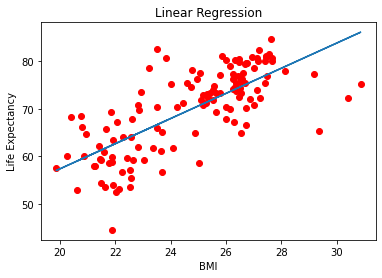

In [69]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred)
plt.title('Linear Regression')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')

# 5. Re-do but with training and test sets

In [32]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [81]:
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)
print(type(X_test), X_test.shape)
print(type(y_test), y_test.shape)

<class 'pandas.core.frame.DataFrame'> (96, 1)
<class 'pandas.core.frame.DataFrame'> (96, 1)
<class 'pandas.core.frame.DataFrame'> (33, 1)
<class 'pandas.core.frame.DataFrame'> (33, 1)


In [72]:
bmi_life_model2 = LinearRegression().fit(X_train, y_train)

In [79]:
print(f"Training set Score R^2: {bmi_life_model2.score(X_train, y_train):.2f}")
print(f"Test set Score R^2:\t{bmi_life_model2.score(X_test, y_test):.2f}")

Training set Score R^2: 0.53
Test set Score R^2:	0.51


## Do not keep X and y in DataFrames

In [75]:
X_values = bmi_life_data['BMI'].values                     # By using [] it becomes a series
y_values = bmi_life_data['Life expectancy'].values
print(type(x_values), x_values.shape)
print(type(y_values), y_values.shape)

<class 'pandas.core.series.Series'> (129,)
<class 'numpy.ndarray'> (129,)


In [76]:
# Need to convert the X into a 2D array. reshape() does that
# when you have -1 keep, when you have 1 you add 1
X_values = X_values.reshape(-1, 1)
print(X_values.shape)

(129, 1)


In [78]:
bmi_life_model3 = LinearRegression().fit(X_values, y_values)

In [80]:
print(f"Model Score R^2: {bmi_life_model3.score(X_values, y_values):.2f}")

Model Score R^2: 0.53
